In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
plt.style.use('seaborn')

In [8]:
data_banking = pd.read_csv("banking.csv")
data_salary = pd.read_csv("salary_data.csv")


In [3]:
data_banking

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [4]:
data_salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [10]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

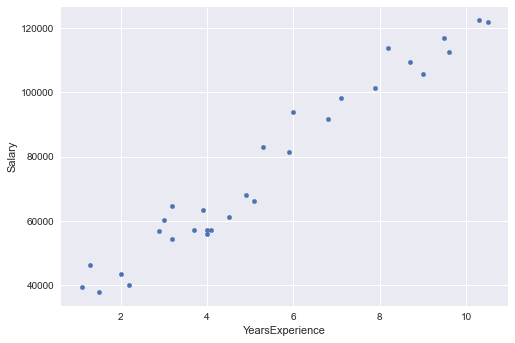

In [11]:
data_salary.plot.scatter(x='YearsExperience',y='Salary')

In [12]:
#split
import sklearn
from sklearn.model_selection import train_test_split

In [13]:
train_data,test_data = train_test_split(data_salary,test_size=0.2,random_state=12)

In [14]:
print("total data train",train_data.shape[0])

total data train 24


In [15]:
print("total data test",test_data.shape[0])

total data test 6


In [20]:
train_label = train_data['Salary']

In [18]:
train_feature = train_data.drop(['Salary'],axis=1)

In [19]:
test_label = test_data['Salary']

In [21]:
test_feature = test_data.drop(['Salary'],axis=1)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr_model = LinearRegression()

In [24]:
lr_model.fit(X=train_feature,y=train_label)

LinearRegression()

In [25]:
from sklearn.metrics import r2_score

In [26]:
accuracy_score = lr_model.score(test_feature,test_label)

In [30]:
print(accuracy_score*100)

94.29269163491423


In [31]:
salary_pred = lr_model.predict(test_feature)

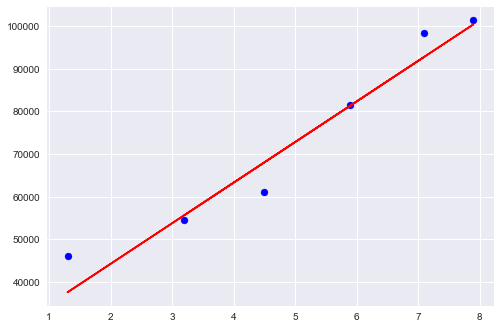

In [33]:
plt.scatter(test_data['YearsExperience'],test_data['Salary'],color='blue')
plt.plot(test_data['YearsExperience'],salary_pred,color='red')

In [34]:
print('coef',lr_model.coef_[0])
print('intercept',lr_model.intercept_)


coef 9509.996327102475
intercept 25243.603151676223
